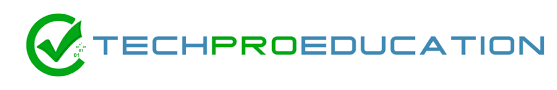

<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
store = pd.read_csv("store_sharing.csv")
store

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [3]:
store.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
for i in pd.unique(store.keys()):
    print(pd.unique(store[i]))

['2015-01-04 00:00:00' '2015-01-04 01:00:00' '2015-01-04 02:00:00' ...
 '2017-01-03 21:00:00' '2017-01-03 22:00:00' '2017-01-03 23:00:00']
[ 182  138  134 ... 2842   10 2220]
[ 3.          2.5         2.          1.          1.5         4.
  5.          6.          6.5         7.          8.          9.
 10.          9.5         8.5        11.          7.5         5.5
  4.5         3.5        11.5        12.         10.5        12.5
 13.         13.5        15.         15.5        14.          0.5
  0.         -0.5        -1.         -1.5        16.         14.5
 16.5        17.5        17.         18.         19.5        20.5
 20.         18.5        21.5        22.5        22.         23.5
 23.         24.         25.         19.         21.         24.5
 25.5        26.         27.         28.5        29.         30.
 33.         32.         31.5        33.5        34.         29.5
 27.5        26.5        28.         30.5        31.         32.5
 10.33333333]
[ 2.          2.5     

In [5]:
store.duplicated().sum()

0

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


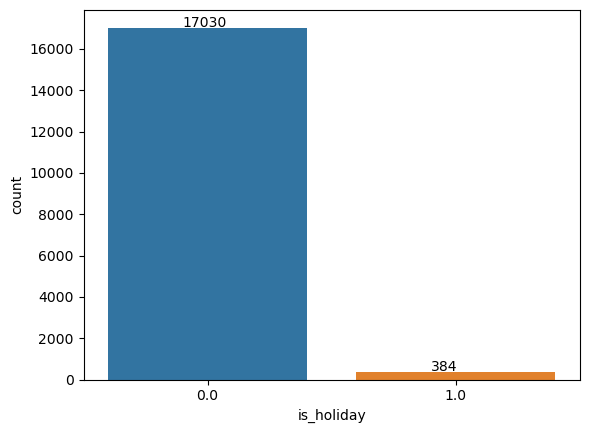

In [33]:
ax = sns.countplot(x = store["is_holiday"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+20));
#Since timestamp data has 24 entry for every each day, these values are 24 times bigger than the original values.
#But some timestamp data has not 24 entry, maybe gruopby much better choice for it.
#holiday count is lower for this data

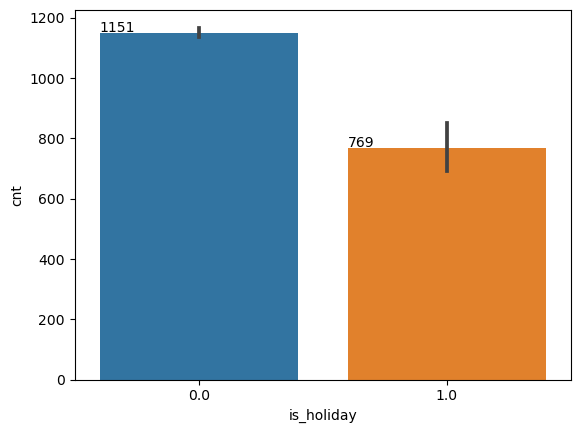

In [43]:
ax = sns.barplot(x = store["is_holiday"],y = store["cnt"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+2));
#bike sharing mean is lower for holidays.

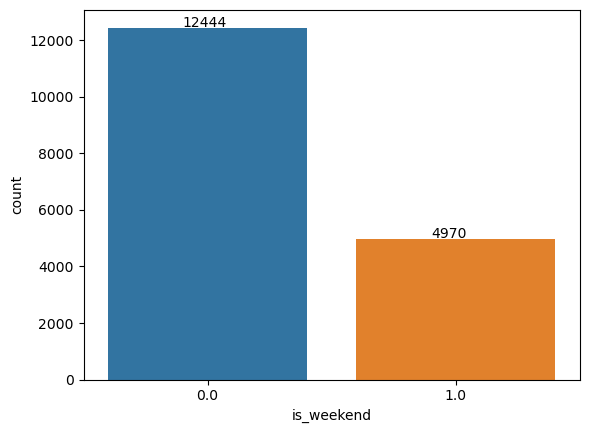

In [34]:
ax = sns.countplot(x = store["is_weekend"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+20));
#Since timestamp data has 24 entry for every each day, these values are 24 times bigger than the original values.
#But some timestamp data has not 24 entry, maybe gruopby much better choice for it.
#weekend count is lower for this data

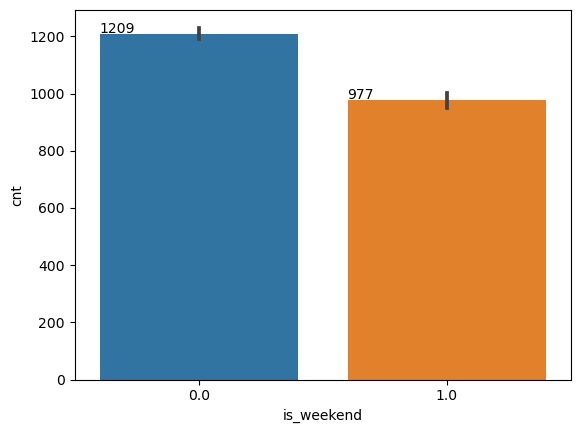

In [44]:
ax = sns.barplot(x = store["is_weekend"],y = store["cnt"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+2));
#bike sharing mean is lower for weekends.

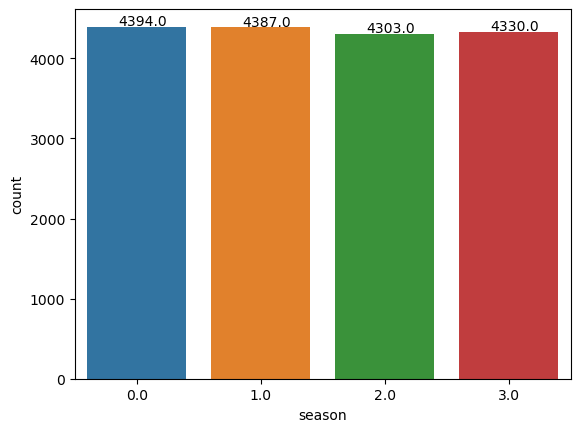

In [17]:
ax = sns.countplot(x = store["season"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+20));
#Since timestamp data has 24 entry for every each day, these values are 24 times bigger than the original values.
#But some timestamp data has not 24 entry, maybe gruopby much better choice for it.
#season count closer to each other as we expected like above results

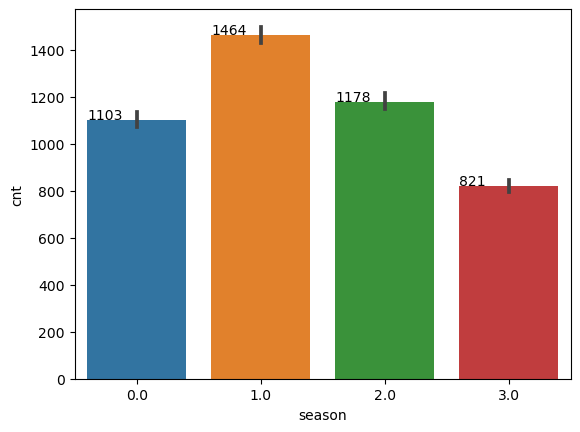

In [45]:
ax = sns.barplot(x = store["season"],y = store["cnt"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+2));
#bike sharing mean is higher for summer ,lower for winter. Bike sharing is better for hot days.

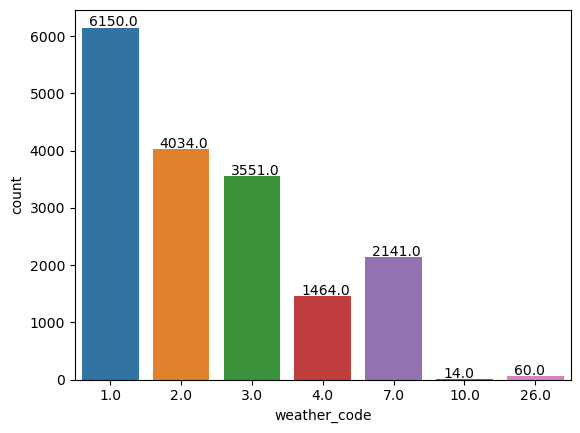

In [35]:
ax = sns.countplot(x = store["weather_code"])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+20));
#Since timestamp data has 24 entry for every each day, these values are 24 times bigger than the original values.
#But some timestamp data has not 24 entry, maybe gruopby much better choice for it.
#clear weather count is higher for the data

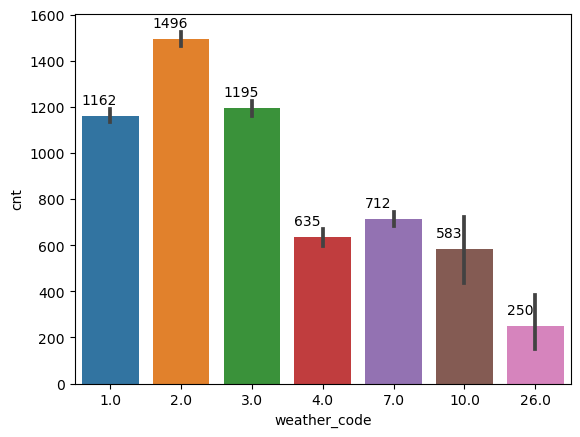

In [49]:
ax = sns.barplot(x = store["weather_code"],y = store["cnt"])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()+50));
#bike sharing mean is higher for scatter cloudy days.

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [50]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [51]:
store["timestamp"] = pd.to_datetime(store["timestamp"])

In [52]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [53]:
store

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [54]:
store.set_index("timestamp",inplace=True)

In [55]:
store

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

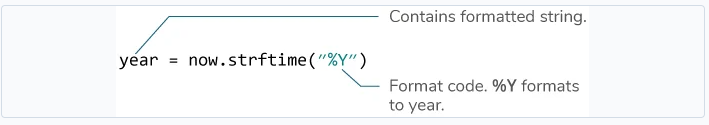

In [56]:
store["year"] = store.index.strftime("%Y")

In [57]:
store["month"] = store.index.strftime("%-m")

In [58]:
store["day"] = store.index.strftime("%-d")

In [59]:
store["time"] = store.index.strftime("%H:%M:%S")

In [60]:
store["hour"] = store.index.strftime("%-H")

In [61]:
store["day_of_the_week"] = store.index.strftime("%A")

In [62]:
store["month_of_the_year"] = store.index.strftime("%B")

In [80]:
store["year_month"] = store.index.strftime("%Y-%B")

In [73]:
store["year_month_day"] = store.index.strftime("%Y-%B-%-d")

In [77]:
store["year_month_day"] = pd.to_datetime(store["year_month_day"])

In [65]:
store.sample(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,time,hour,day of the week,month of the year,year and month,year and month and day
timestamp,,,,,,,,,,,,,,,,,,
2015-05-22 18:00:00,3016,19.5,19.5,58.0,9.5,3.0,0.0,0.0,0.0,2015,5,22,18:00:00,18,Friday,May,2015-May,2015-May-22
2015-03-07 14:00:00,3118,16.0,16.0,46.5,23.0,1.0,0.0,1.0,0.0,2015,3,7,14:00:00,14,Saturday,March,2015-March,2015-March-7
2015-12-12 09:00:00,716,8.5,7.5,73.5,6.0,7.0,0.0,1.0,3.0,2015,12,12,09:00:00,9,Saturday,December,2015-December,2015-December-12
2015-12-03 22:00:00,443,12.5,12.5,85.0,30.5,7.0,0.0,0.0,3.0,2015,12,3,22:00:00,22,Thursday,December,2015-December,2015-December-3
2016-06-08 18:00:00,4007,22.5,22.5,67.0,3.5,2.0,0.0,0.0,1.0,2016,6,8,18:00:00,18,Wednesday,June,2016-June,2016-June-8


In [78]:
store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cnt                     17414 non-null  int64         
 1   t1                      17414 non-null  float64       
 2   t2                      17414 non-null  float64       
 3   hum                     17414 non-null  float64       
 4   wind_speed              17414 non-null  float64       
 5   weather_code            17414 non-null  float64       
 6   is_holiday              17414 non-null  float64       
 7   is_weekend              17414 non-null  float64       
 8   season                  17414 non-null  float64       
 9   year                    17414 non-null  object        
 10  month                   17414 non-null  object        
 11  day                     17414 non-null  object        
 12  time       

<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

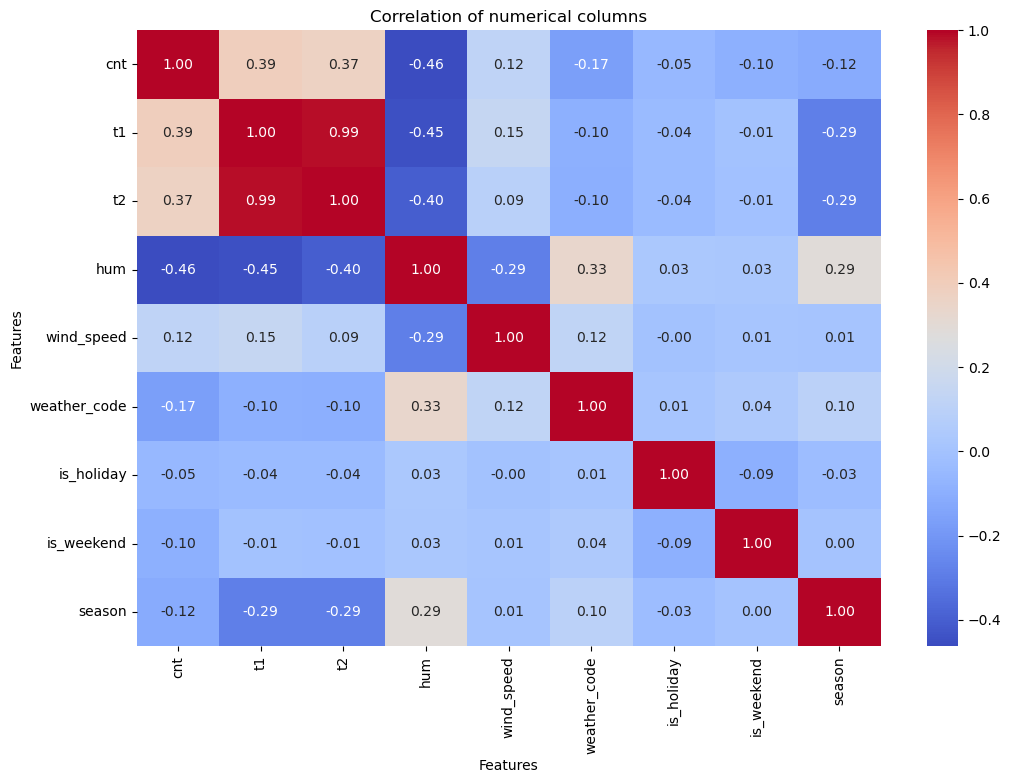

In [68]:
correlation_matrix = store.select_dtypes("number").corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation of numerical columns")

plt.show()

#t1 and t2 features higly correlated each other, we can drop one of two.

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

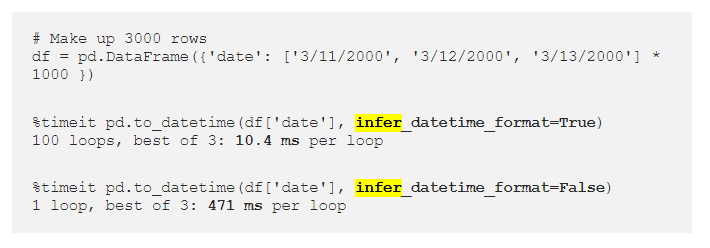

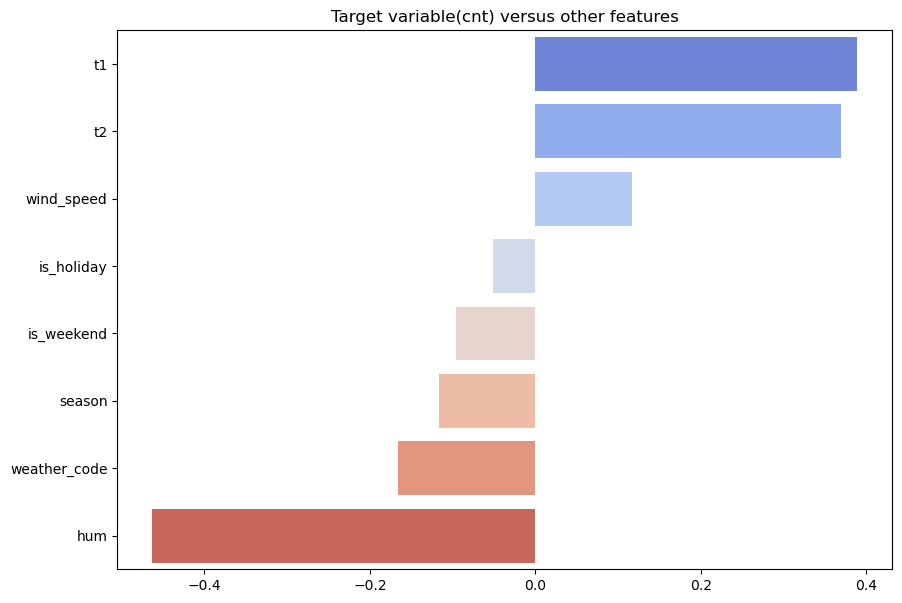

In [69]:
correlation_matrix = store.select_dtypes("number").corr()

correlation_with_cnt = correlation_matrix["cnt"].drop("cnt")
correlation_with_cnt = correlation_with_cnt.sort_values(ascending=False)

plt.figure(figsize=(10, 7))

sns.barplot(x=correlation_with_cnt.values, y=correlation_with_cnt.index, palette="coolwarm")

plt.title("Target variable(cnt) versus other features")

plt.show()

#bike sharing positivly correlated with heat, negatively correlated with humidity.

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

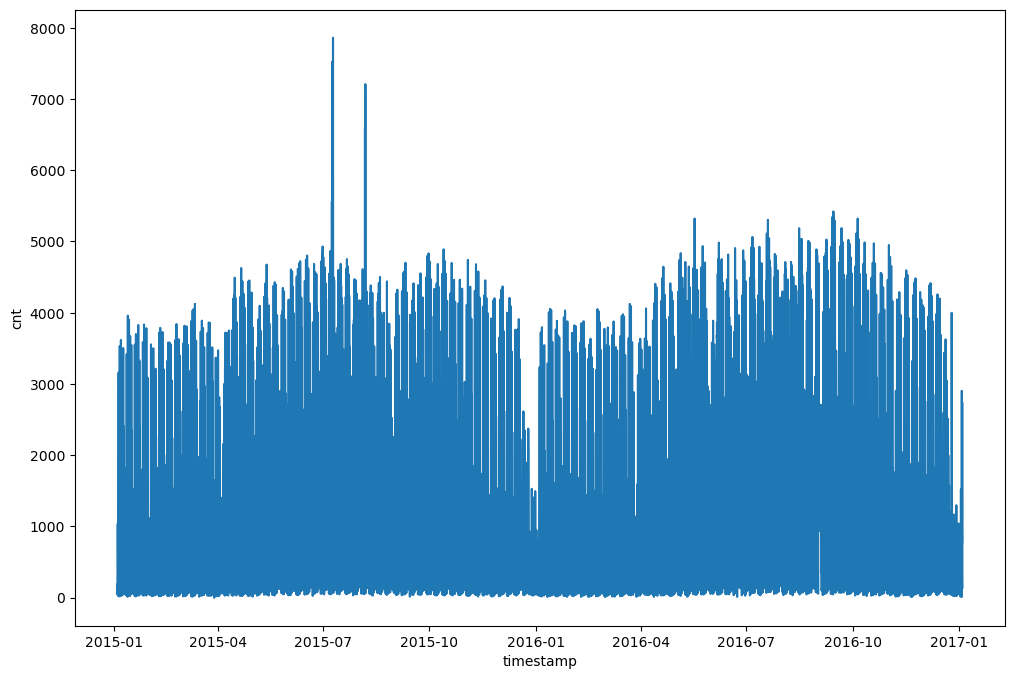

In [72]:
plt.figure(figsize=(12, 8))

sns.lineplot(data = store, y="cnt", x="timestamp");
#this plot give us hourly result of bike sharing

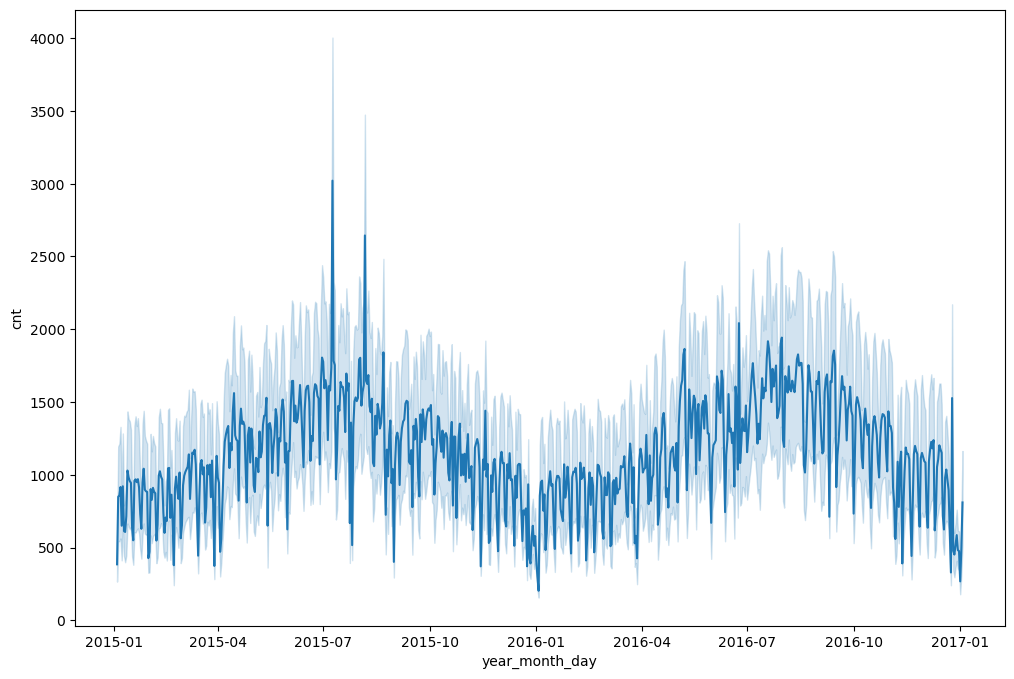

In [79]:
plt.figure(figsize=(12, 8))

sns.lineplot(data = store, y="cnt", x="year_month_day", estimator='mean');
#this plot give us dayly average result of bike sharing
#yearly result will not give us a deep result since 2017 entries fewer

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

In [83]:
#barplot's and lineplot's estimator is defaulted by mean. Hence we should write it down the report.

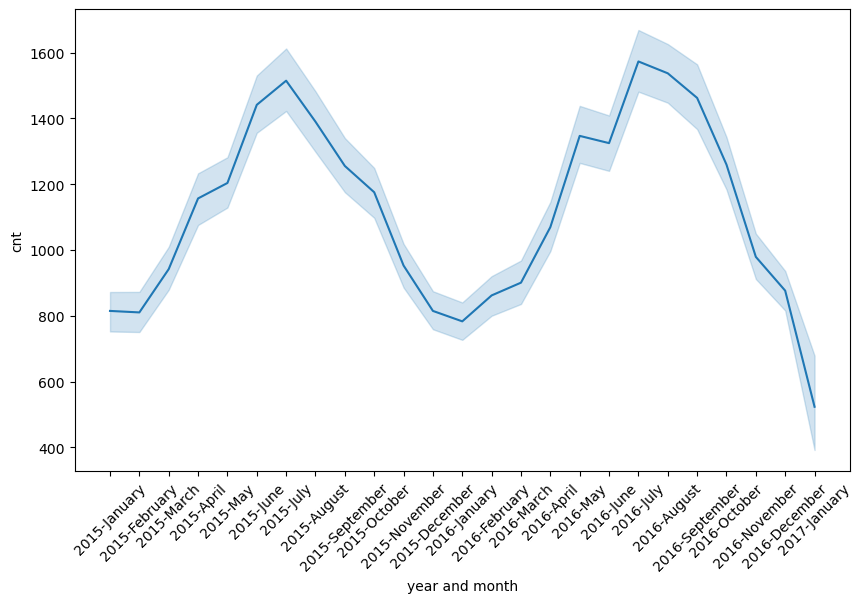

In [86]:
plt.figure(figsize=(10, 6))

sns.lineplot(data = store, y="cnt", x="year and month")
plt.xticks(rotation=45);
#in here year and month data type is not datetime
#we can observe periodic movement for the bike sharing data
#bike sharing is higher at summer months.

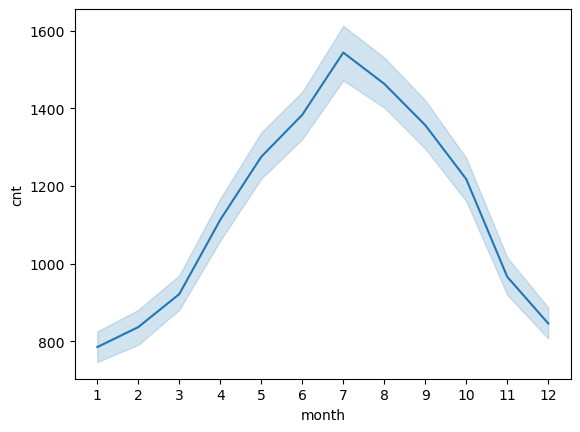

In [87]:
sns.lineplot(data = store, y="cnt", x="month");


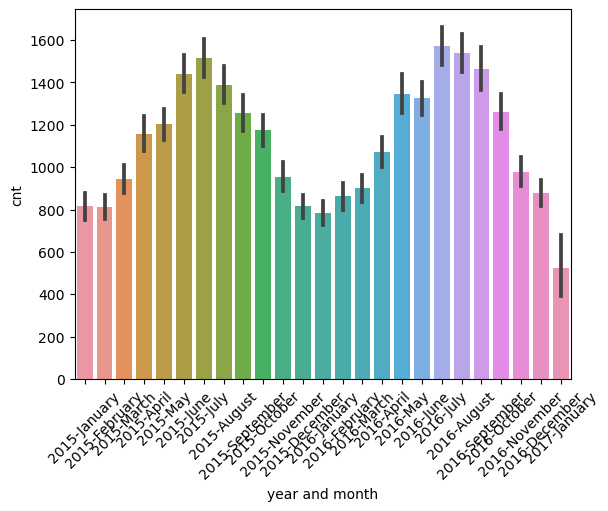

In [90]:
sns.barplot(data = store, y="cnt", x="year and month" )
plt.xticks(rotation=45);

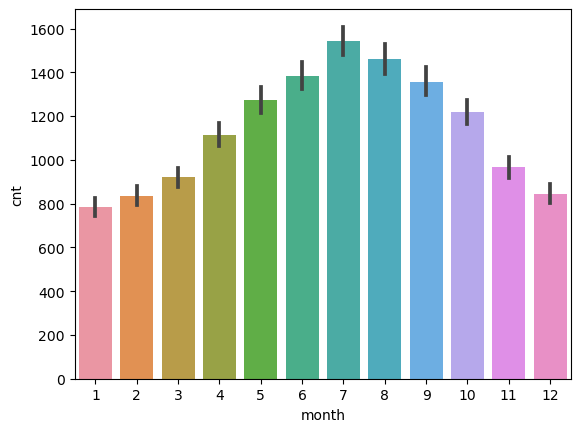

In [88]:
sns.barplot(data = store, y="cnt", x="month" );


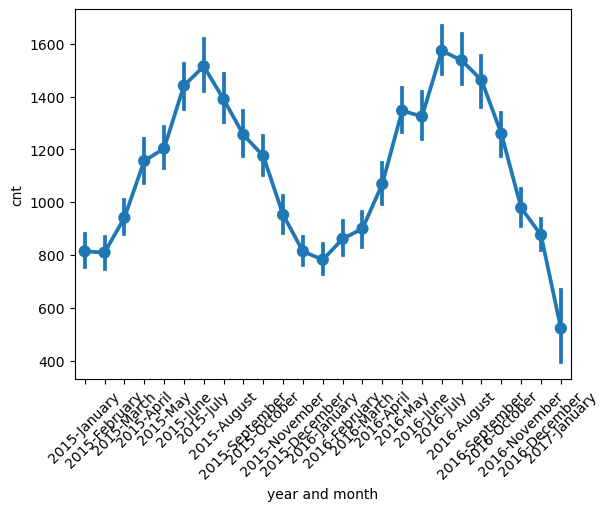

In [91]:
sns.pointplot(data = store, y="cnt", x="year and month" )
plt.xticks(rotation=45);

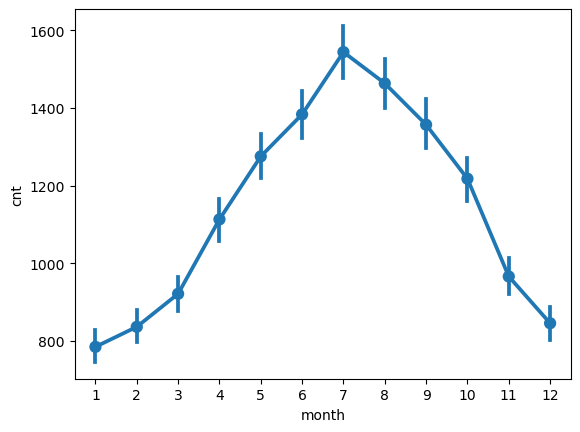

In [92]:
sns.pointplot(data = store, y="cnt", x="month" );

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

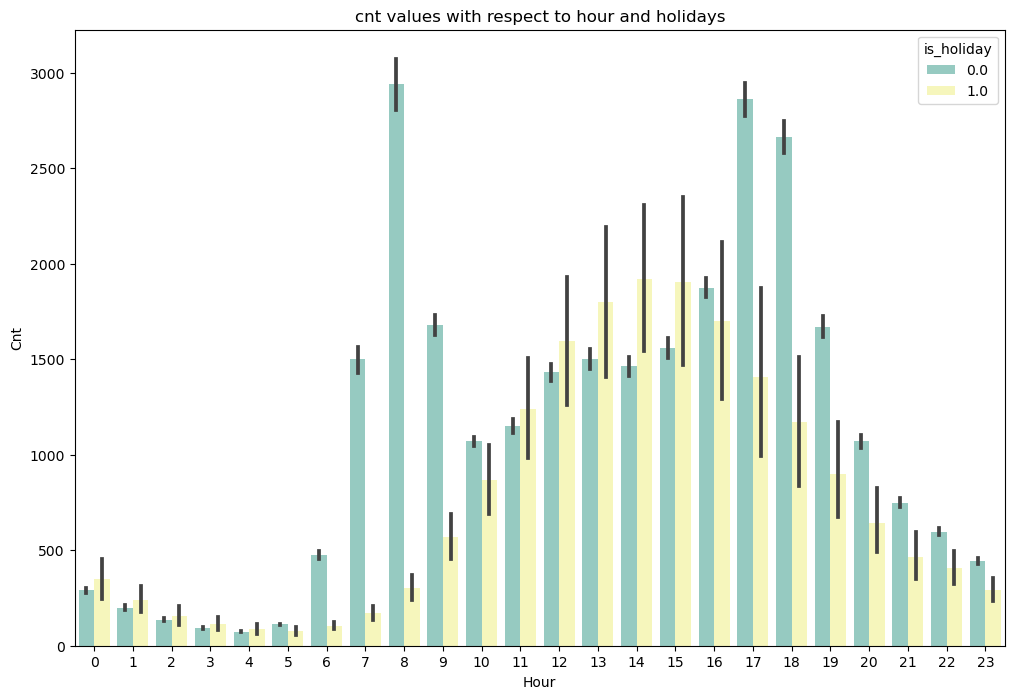

In [96]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="hour", y="cnt", hue="is_holiday", palette="Set3")

plt.xlabel("Hour")
plt.ylabel("Cnt")
plt.title("cnt values with respect to hour and holidays")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)

plt.show()
#bike sharing is higher at daytime
#at 8 days that are not holiday bike sharing is high, probably this result is work related(Same as at 17 and 18).

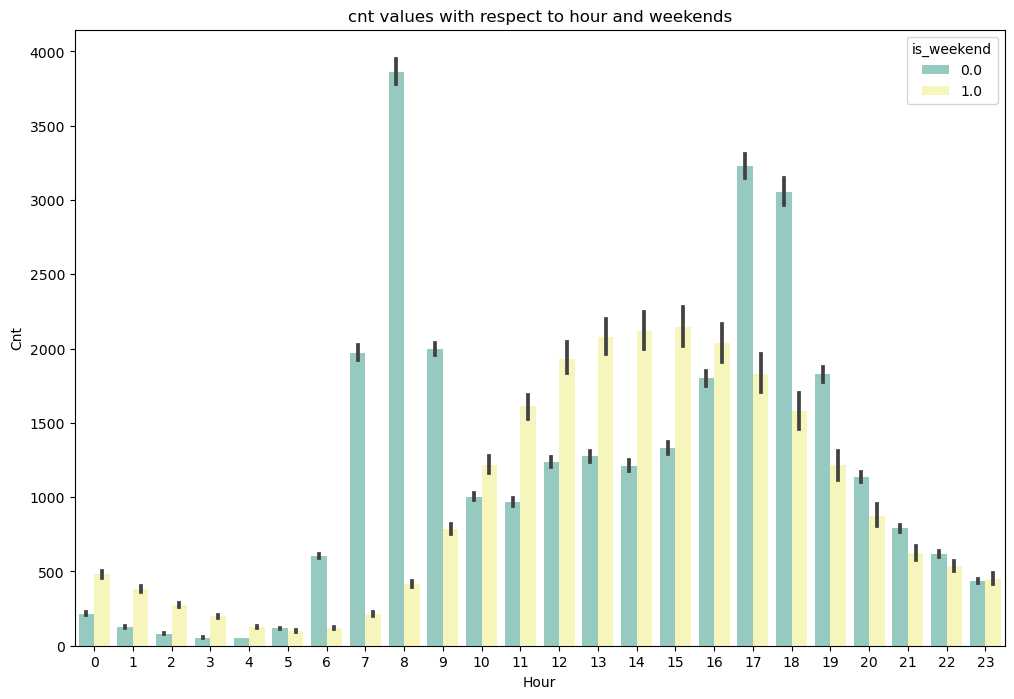

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="hour", y="cnt", hue="is_weekend", palette="Set3")

plt.xlabel("Hour")
plt.ylabel("Cnt")
plt.title("cnt values with respect to hour and weekends")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)

plt.show()
#at 8 days that are not weekend bike sharing is high, probably this result is work related(Same as at 17 and 18).

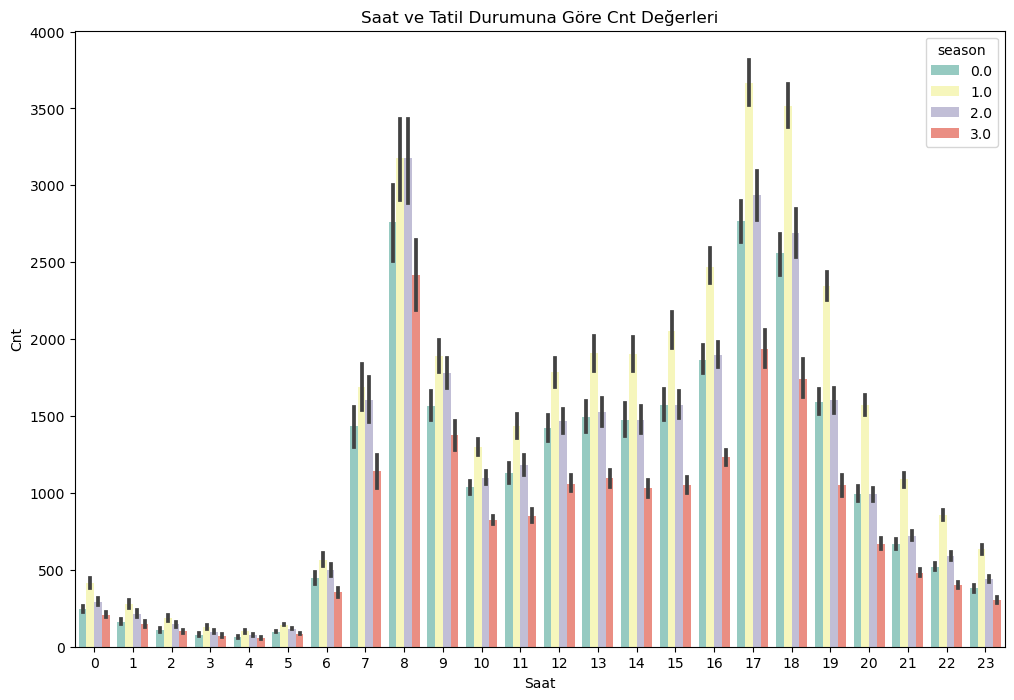

In [98]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="hour", y="cnt", hue="season", palette="Set3")

plt.xlabel("Saat")
plt.ylabel("Cnt")
plt.title("Saat ve Tatil Durumuna Göre Cnt Değerleri")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)

plt.show()
#at 8 summer and fall season bike sharing is higher, probably bad weather conditions effect people's bike sharing.(Same as at 17 and 18).

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

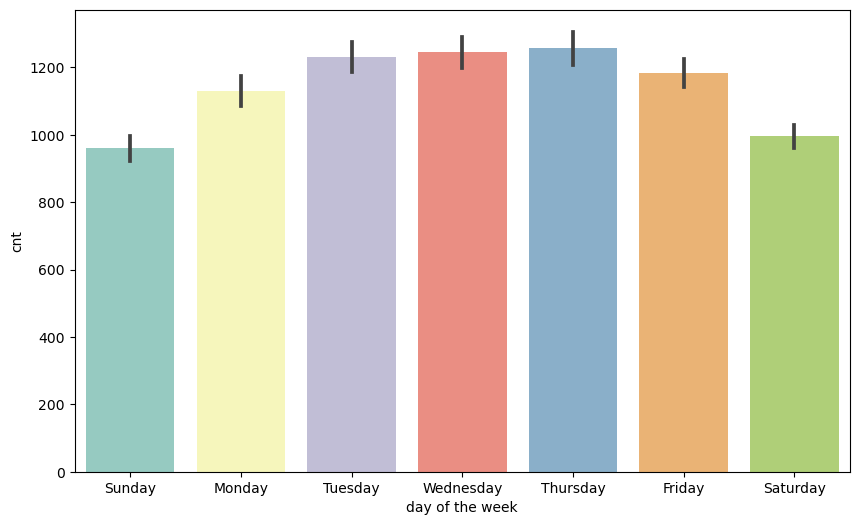

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=store, x="day of the week", y="cnt", palette="Set3")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)
plt.show()
#bike sharing is getting high in the middle of the weekday

In [116]:
store[store["is_holiday"] == 1.0].groupby("day of the week").size()/24

day of the week
Friday      4.0
Monday     11.0
Tuesday     1.0
dtype: float64

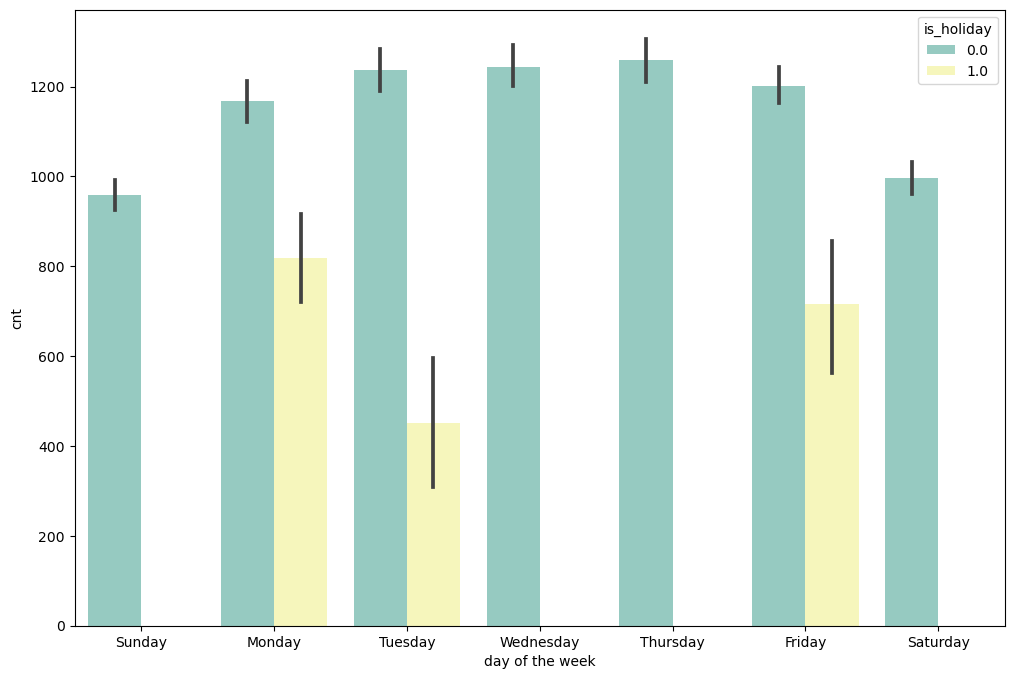

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="day of the week", y="cnt", hue="is_holiday", palette="Set3")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)

plt.show()
#holidays : 4 times Friday, 11 times Monday, 1 time Tuesday
#hence above code does not give a clear insight

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

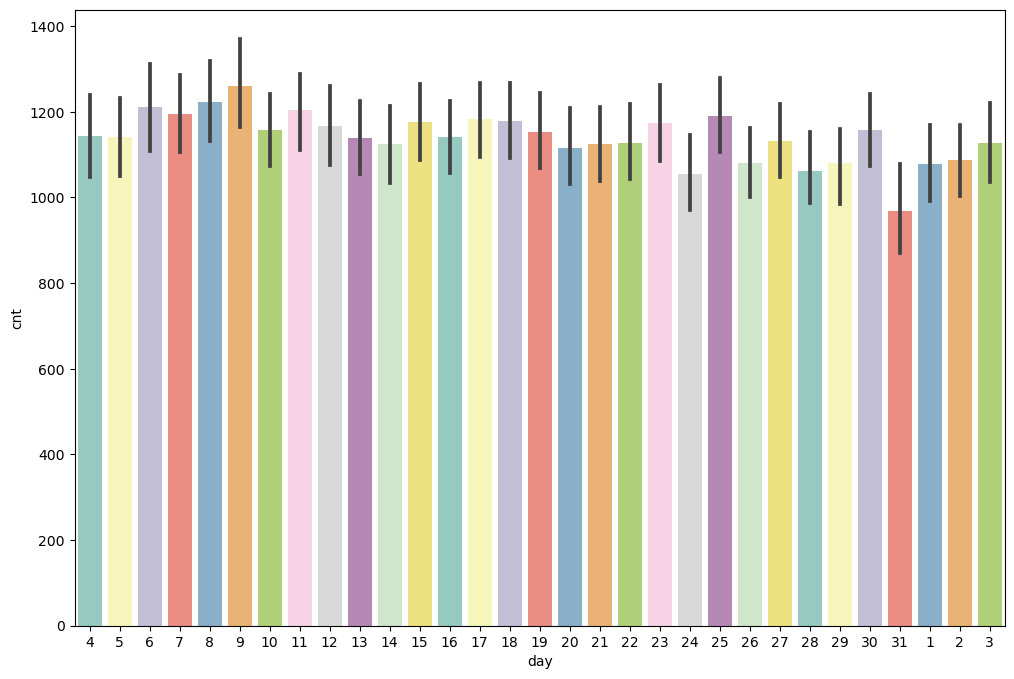

In [118]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="day", y="cnt", palette="Set3")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

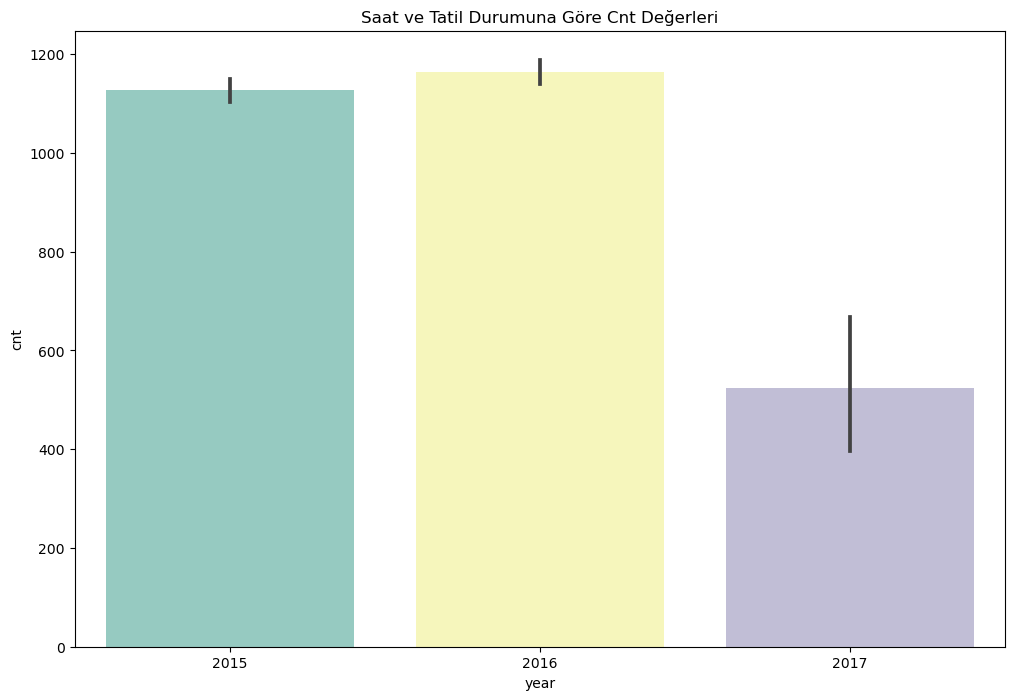

In [112]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="year", y="cnt", palette="Set3")

plt.title("Saat ve Tatil Durumuna Göre Cnt Değerleri")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)

plt.show()

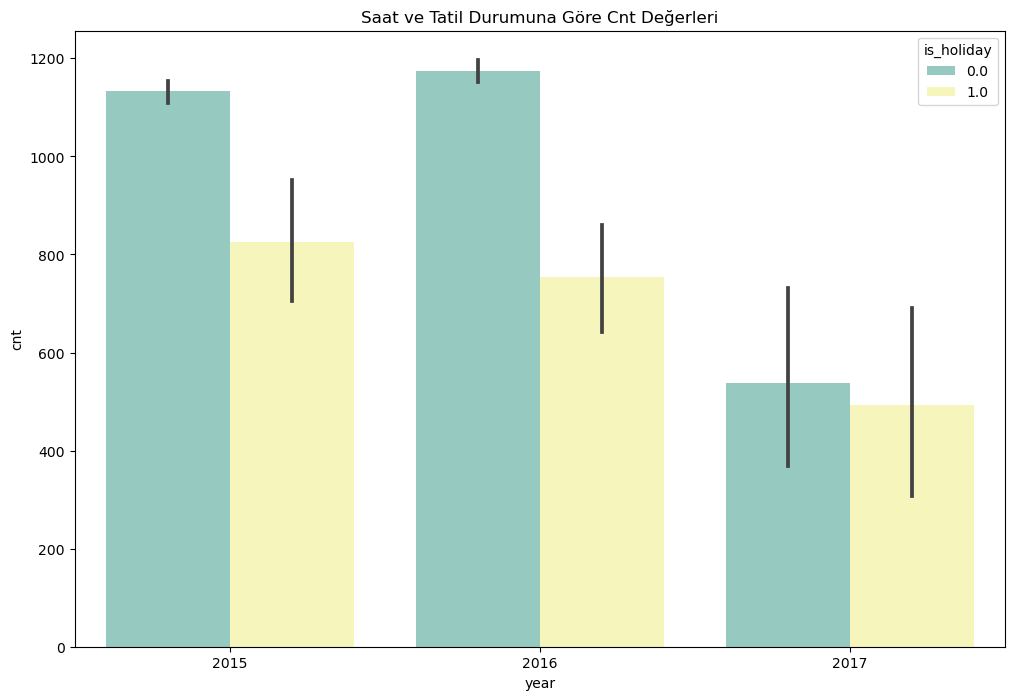

In [113]:
plt.figure(figsize=(12, 8))
sns.barplot(data=store, x="year", y="cnt", hue = "is_holiday", palette="Set3")

plt.title("Saat ve Tatil Durumuna Göre Cnt Değerleri")

plt.axhline(0, color="k", linestyle="-", linewidth=0.5)

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

In [120]:
grouped_data

is_weekend
0.0    15048216
1.0     4857756
Name: cnt, dtype: int64

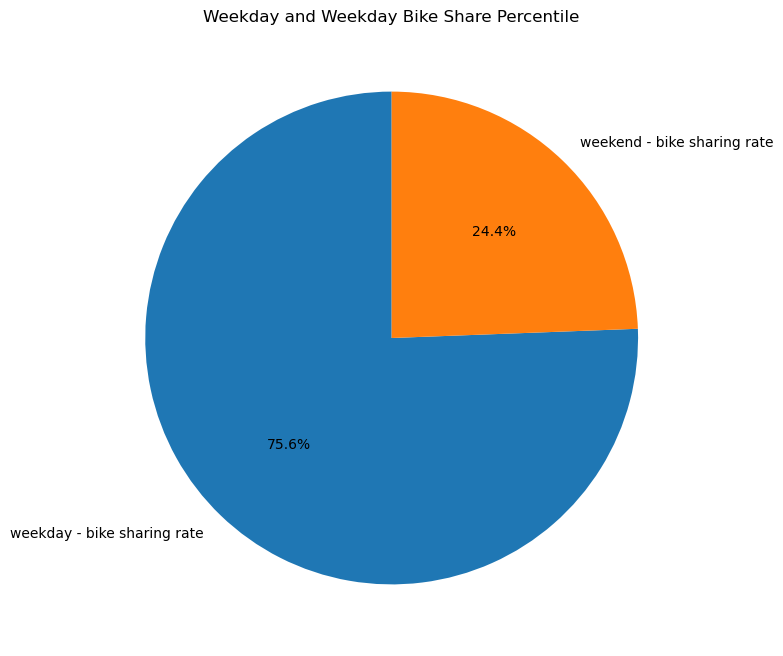

In [125]:
grouped_data = store.groupby("is_weekend")["cnt"].sum()

labels = ["weekday - bike sharing rate","weekend - bike sharing rate"]
sizes = grouped_data.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Weekday and Weekday Bike Share Percentile")

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

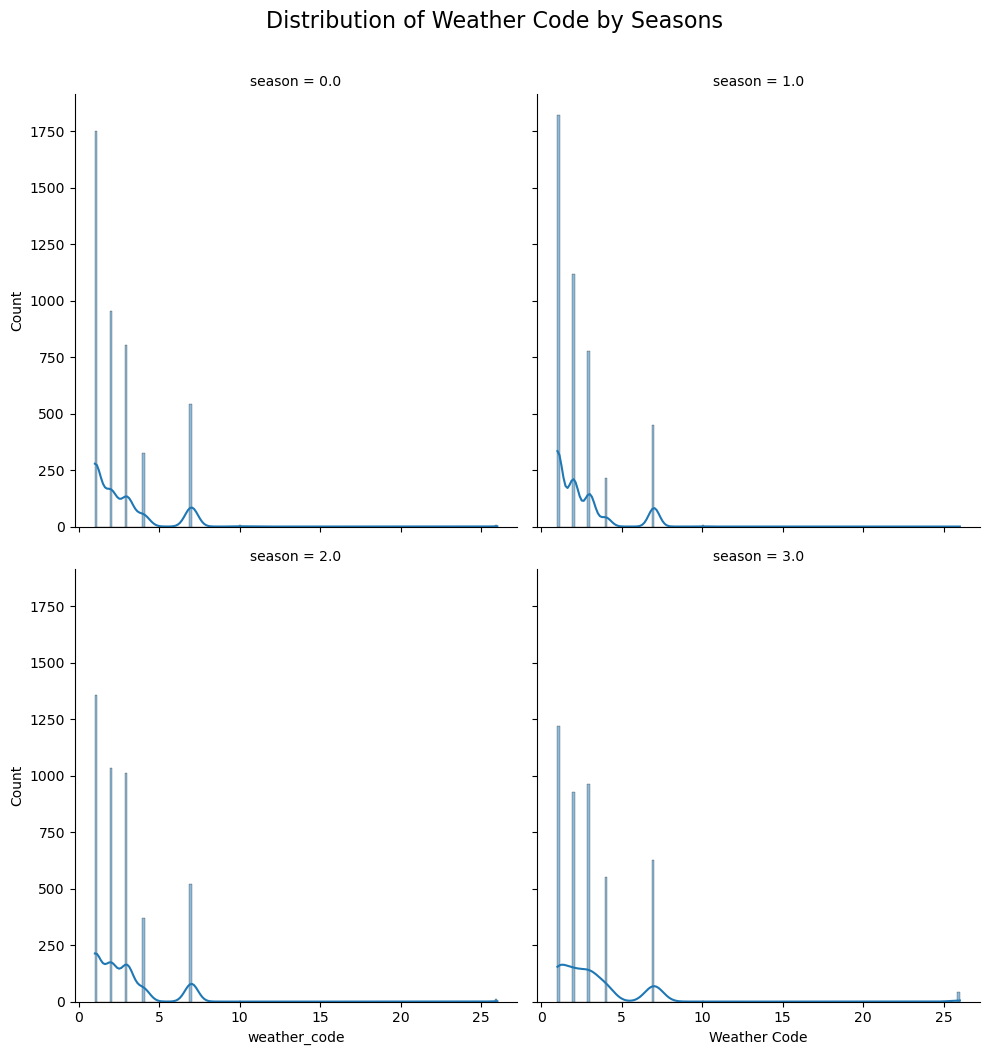

In [128]:
sns.displot(data=store, x="weather_code", col="season", col_wrap=2, kde=True)

# Set the axis labels and title
plt.xlabel("Weather Code")
plt.ylabel("Count")
plt.suptitle("Distribution of Weather Code by Seasons", fontsize=16, y=1.05)

# Display the plot
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>

1) At 8 (same as at 17 and 18) o'clock summer and fall season, bike sharing is higher than other season, probably bad weather conditions effect people's bike sharing.

2) Bike sharing is higher in the middle of the weekday.

3) Weekday bike sharing rate is %75,6.

4) Bike sharing is higher at daytime

5) At 8 (same as at 17 and 18) o'clock days that are not holiday bike sharing is high, probably this result is work related.

6) Bike sharing is higher at summer months.

7) Bike sharing positivly correlated with heat, negatively correlated with humidity.

8) Bike sharing mean is higher for summer ,lower for winter.

9) Bike sharing mean is lower for holidays.

10) Bike sharing mean is lower for weekends.

11) Bike sharing mean is higher for scatter cloudy days.

<div class="alert alert-block alert-info">
<span style=" color:red">Thanks for Attending!..
    

</span>

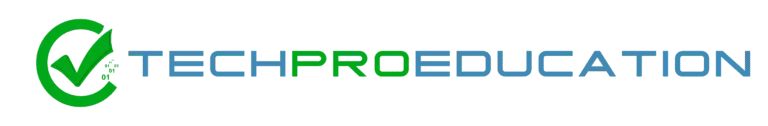